### Exemplo de aprendizagem supervisionada: Classificação com o conjunto de dados Iris

Vamos ver mais um exemplo desse processo, usando o conjunto de dados Iris. 
A pergunta será esta: usando um modelo treinado em uma parte do conjunto de dados Iris, com que eficácia será possível prever os valores restantes?

![Iris](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)
<br>


Importando as bibliotecas e os dados de exemplo que já existem no Seaborn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
iris = sns.load_dataset('iris') #importando os dados de exemplo que já tem no seaborn
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.tail() #olhando o final do arquivo

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [4]:
iris.species.value_counts() #contando por tipo de Iris

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [8]:
#verificando a correlação entre as variáveis

iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


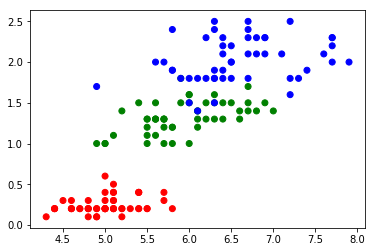

In [6]:
#verificando as flores por tipo em um gráfico

fig, ax = plt.subplots()
colors = {'setosa':'red', 'virginica':'blue', 'versicolor':'green'}

ax.scatter(iris['sepal_length'],
           iris['petal_width'],
           c=iris['species'].apply(lambda x: colors[x])
          )

C:\Users\Marcos\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Marcos\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


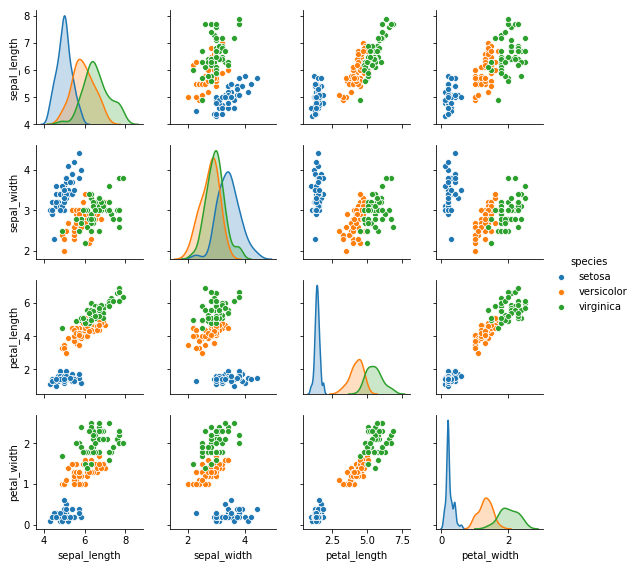

In [7]:
#verificando a correlação de todas as variávies numéricas em gráficos

sns.pairplot(iris, hue="species", size=2)

In [11]:
X_iris = iris[['sepal_length', ]]
X_iris.head(10)

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
5,5.4
6,4.6
7,5.0
8,4.4
9,4.9


In [15]:
X_iris = iris.drop('species', axis=1)
X_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y_iris = iris['species']
y_iris.shape

(150,)

Para esta tarefa, vamos usar um modelo generativo bastante simples, conhecido como Naive Bayes Gaussiano, que presume que cada classe é construída a partir de uma distribuição Gaussiana. 

Como é muito rápido e não tem hiperparâmetros para escolher, Naive Bayes Gaussiano costuma ser um bom modelo para usar como classificação baseline antes de explorar se é possível conseguir melhorias usando modelos mais sofisticados.

Com os dados preparados, podemos seguir a receita para prever o restante:

In [17]:
from sklearn.naive_bayes import GaussianNB # 1. escolher a classe de modelo
model = GaussianNB() # 2. instanciar o modelo
model.fit(X_iris, y_iris) # 3. ajustar o modelo aos dados
yhat = model.predict(X_iris) # 4. prever
yhat

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica',

Verificando a acurácia do modelo

In [19]:
comparativo = list(zip(list(y_iris), list(yhat)))

acertos = 0
erros = 0

for row in comparativo:
    if row[0]==row[1]:
        acertos += 1
    else:
        erros += 1
        
print(f'''Acertos: {acertos},
Erros: {erros},
Taxa: {acertos/(acertos+erros)}''')

Acertos: 144,
Erros: 6,
Taxa: 0.96


O modelo deve ser avaliado por dados que não tenham sido usados no treinamento, pois este participou das regras que o algoritimo criou para separar o dataset. Assim, é necessário divididir os dados em um conjunto de treinamento e um conjunto de teste.

Função ``train_test_split``.

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1) 
#random state pega o total dos dados, se for 1. Pode-se determinar a quantidade em  %, por exemplo 20% = 0.2

In [21]:
print(Xtest.shape)
print(ytest.shape)

(38, 4)
(38,)


In [22]:
print(Xtrain.shape)
print(ytrain.shape)

(112, 4)
(112,)


In [23]:
from sklearn.naive_bayes import GaussianNB # 1. escolher a classe de modelo
model = GaussianNB() # 2. instanciar o modelo
model.fit(Xtrain, ytrain) # 3. ajustar o modelo aos dados
yhat = model.predict(Xtest) # 4. prever com dados *NOVOS* (que não participaram do treino)

Verificando a acurácia do modelo

In [24]:
comparativo = list(zip(list(ytest), list(yhat)))

acertos = 0
erros = 0
for row in comparativo:
    if row[0]==row[1]:
        acertos += 1
    else:
        erros += 1
        
print(f'''Acertos: {acertos},
Erros: {erros},
Taxa: {acertos/(acertos+erros)}''')

Acertos: 37,
Erros: 1,
Taxa: 0.9736842105263158


A precisão é superior a 97% mesmo com um algoritmo de classificação simples.